# ***IRIS FLOWER CLASSIFICATION***

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.metrics import * 
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [54]:
df = pd.read_csv("D:\Internship\CodSoft_Adnan\IRIS.csv")

In [55]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [56]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


# EDA

In [57]:
df.shape

(150, 5)

In [58]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [59]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [60]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [61]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


'''

From the above output, we can derive the following insights:

- Total Entries: The dataset comprises 150 rows.

- Columns: There are 5 columns, with a combination of float and object data types. 
           Converting object types to numerical representations may be necessary for certain analysis 
           and modeling tasks.
  
- Missing Values: No missing value



'''

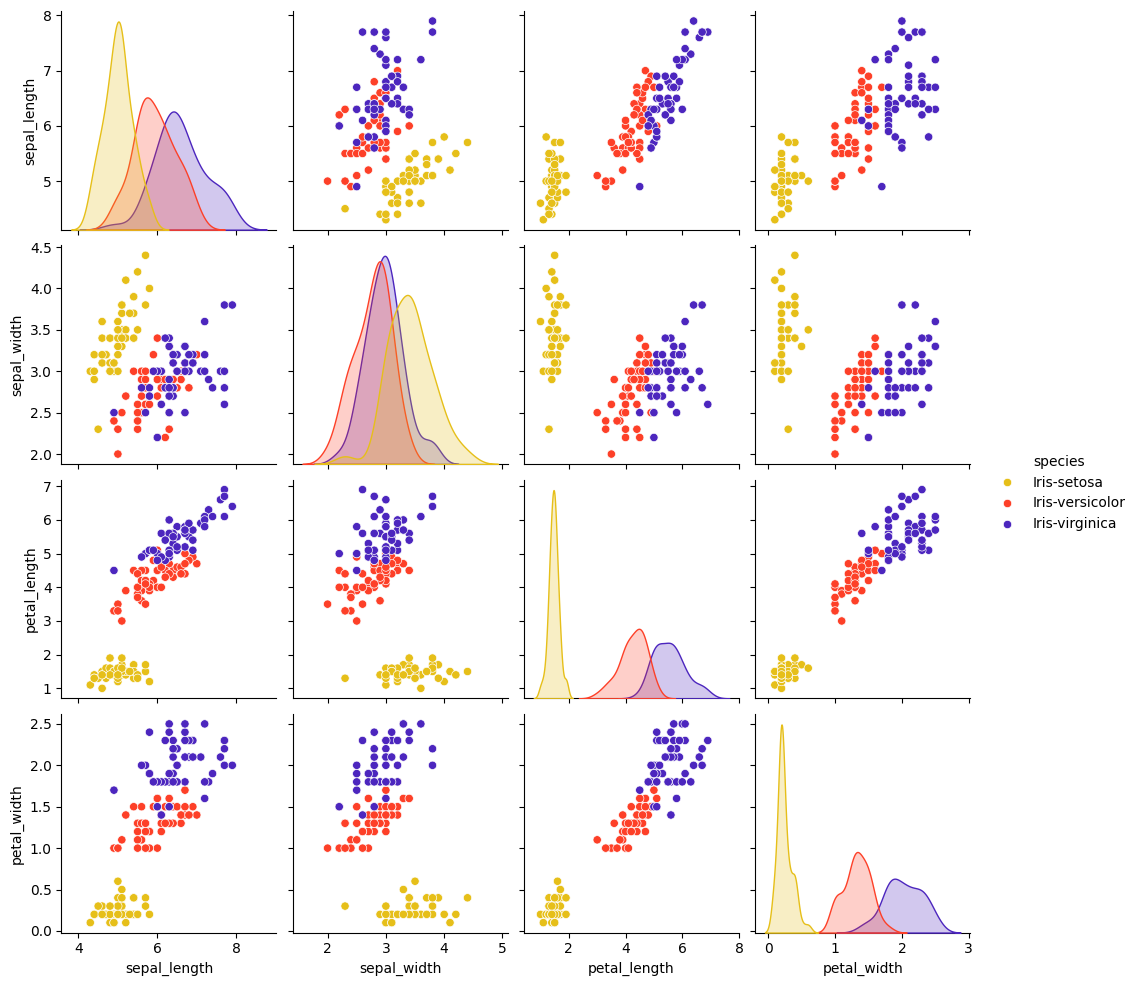

In [63]:
sns.pairplot(df, hue = "species",palette='CMRmap_r')

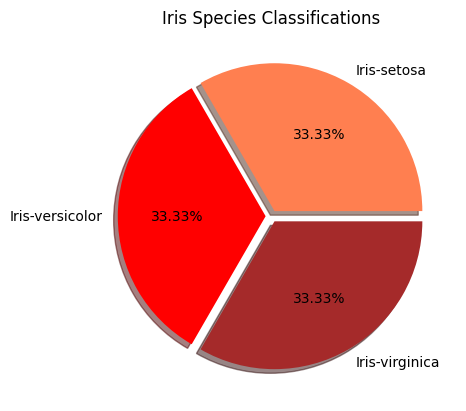

In [64]:
# Plot the pie chart
df['species'].value_counts().plot.pie(
    explode=[0.04, 0.04, 0.04],
    shadow=True,
    autopct='%1.2f%%',
    colors=["coral", "red", "brown"]
).set_title("Iris Species Classifications")

plt.ylabel('')  # Hide the y-label for better visualization
plt.show()


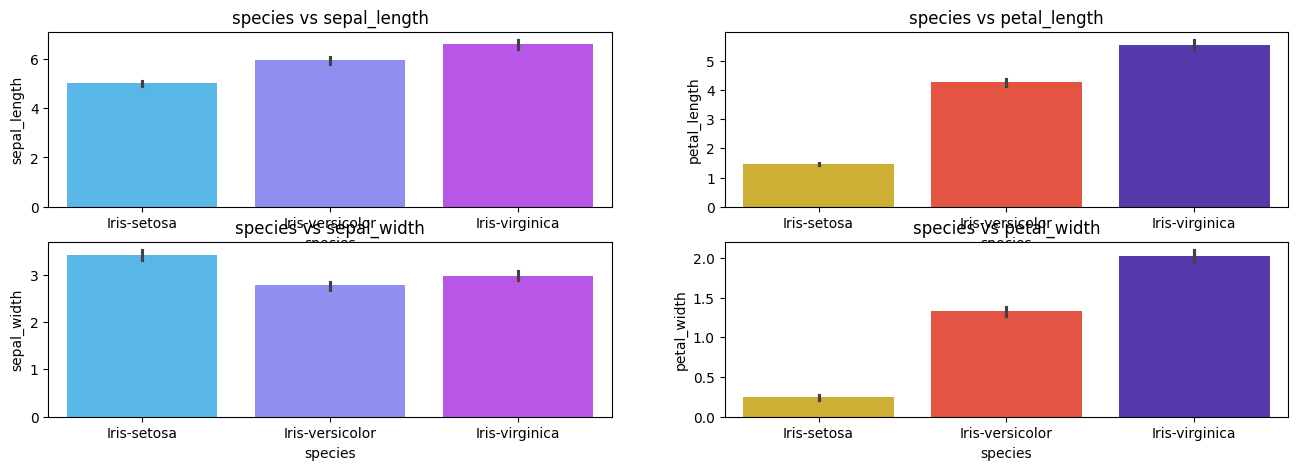

In [65]:
fig,axes=plt.subplots(2,2,figsize=(16,5))

sns.barplot(x=df["species"],y=df["sepal_length"],palette='cool',ax=axes[0][0]).set_title('species vs sepal_length')
sns.barplot(x=df["species"],y=df["sepal_width"],palette='cool',ax=axes[1][0]).set_title('species vs sepal_width')
sns.barplot(x=df["species"],y=df["petal_length"],palette='CMRmap_r',ax=axes[0][1]).set_title('species vs petal_length')
sns.barplot(x=df["species"],y=df["petal_width"],palette='CMRmap_r',ax=axes[1][1]).set_title('species vs petal_width')

plt.show()

'''

Conclusion from bivariative analysis:-

sepal length plot 1
iris-setosa has the shorter sepal length and iris virginica has longer

petal length plot 2
iris-setosa has the shorter petal length and Iris virginica has longer

sepal width plot 3
iris-setosa has the longer sepal width then Iris virginica

petal width plot 4
iris-setosa has the shorter petal width and Iris virginica has longer


'''

## Data Preprocessing 

In [66]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

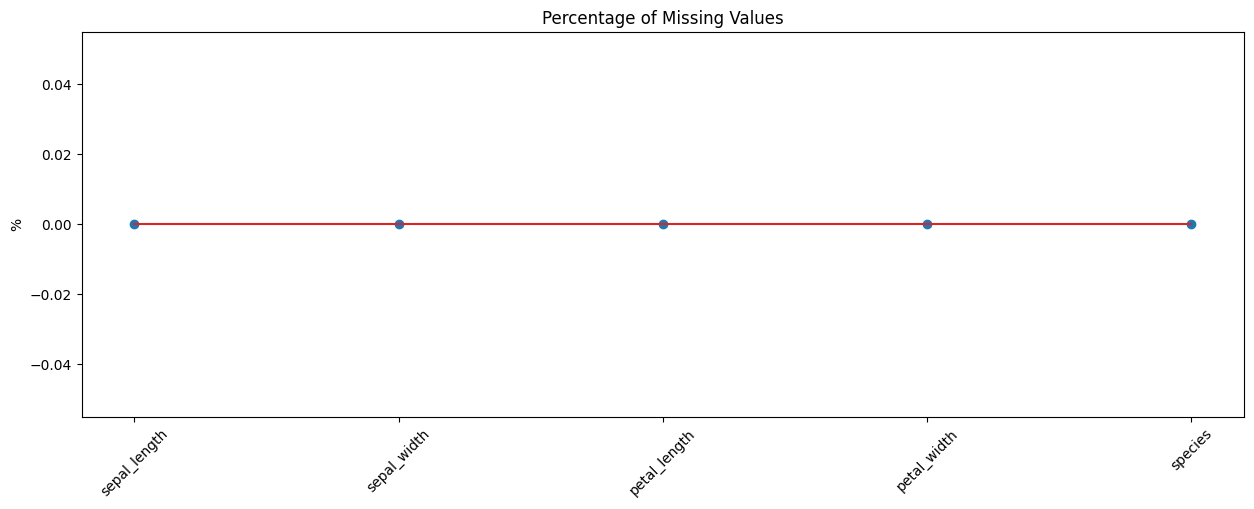

In [67]:
# Visualize the Null values

missing_values_per = pd.DataFrame((df.isnull().sum()/len(df))*100).reset_index()
plt.figure(figsize=(15,5))
plt.stem(missing_values_per['index'],missing_values_per[0])
plt.xticks(rotation=45,fontsize=10)
plt.title('Percentage of Missing Values')
plt.ylabel('%')
plt.show()

In [68]:
df.select_dtypes(include='object').columns


Index(['species'], dtype='object')

In [69]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [70]:
df.species.replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}, inplace=True)

In [71]:
df.select_dtypes(include='object').columns

Index([], dtype='object')

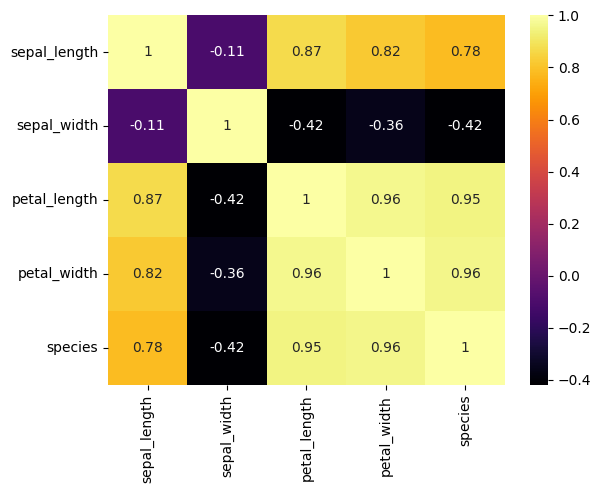

In [72]:

sns.heatmap(df.corr(), annot = True, cmap = 'inferno')
plt.show()

# Model Building

In [73]:
#importing Library
from sklearn.model_selection import train_test_split

In [74]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [75]:
train, test = train_test_split(df, test_size=.20)

In [76]:
# Separate features (X) and target variable (y) for training set
train_x = train.iloc[:, 0:-1]  # All columns except the first one as features
train_y = train.iloc[:, -1]   # The first column as target variable

# Separate features (X) and target variable (y) for testing set
test_x = test.iloc[:, 0:-1]    # All columns except the first one as features
test_y = test.iloc[:, -1]     # The first column as target variable

## Logistic Regression

In [77]:
#importing Library
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression 

logreg = LogisticRegression()
logreg.fit(train_x, train_y)

pred_logreg = logreg.predict(test_x)
print(confusion_matrix(test_y, pred_logreg))             

[[12  0  0]
 [ 0 10  0]
 [ 0  0  8]]


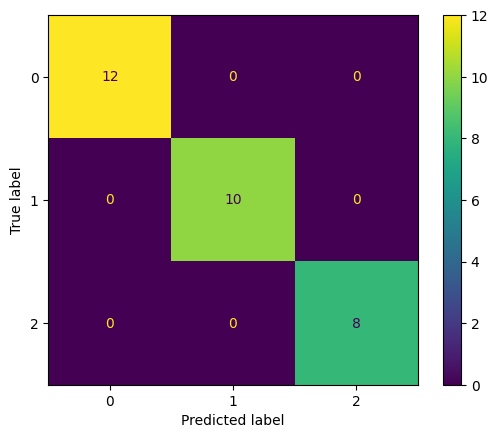

In [78]:
from sklearn.metrics import ConfusionMatrixDisplay
c_matrix=ConfusionMatrixDisplay(confusion_matrix(test_y, pred_logreg))
c_matrix.plot(cmap = plt.cm.viridis)
plt.show()

In [79]:
print(classification_report(test_y, pred_logreg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [80]:
logreg_accuracy = accuracy_score(test_y, pred_logreg)
print("Logestic Regression Accuracy = ",logreg_accuracy)


Logestic Regression Accuracy =  1.0


In [81]:
pred_test_proba_logistic = logreg.predict_proba(test_x)[:,1]

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(train_x, train_y)

DecisionTreeClassifier()

In [ ]:
pred_dt = dt.predict(test_x)
print(confusion_matrix(test_y, pred_dt))     


[[12  0  0]
 [ 0  6  1]
 [ 0  2  9]]


In [ ]:
print(classification_report(test_y, pred_dt)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.75      0.86      0.80         7
           2       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.88      0.89      0.89        30
weighted avg       0.90      0.90      0.90        30



In [ ]:
dt_accuracy = accuracy_score(test_y, pred_dt)
print("Decision Tree Accuracy = ",dt_accuracy)

Decision Tree Accuracy =  0.9


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(train_x, train_y) 

RandomForestClassifier()

In [ ]:
# Evaluate the Random Forest model
pred_rf = rf.predict(test_x)
print(confusion_matrix(test_y, pred_rf))

[[12  0  0]
 [ 0  7  0]
 [ 0  2  9]]


In [ ]:
print(classification_report(test_y, pred_rf)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.78      1.00      0.88         7
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.92        30
weighted avg       0.95      0.93      0.93        30



In [ ]:
rf_accuracy = accuracy_score(test_y, pred_rf)
print("Random Forest Accuracy = ",rf_accuracy)

Random Forest Accuracy =  0.9333333333333333


## SVM

In [ ]:
# Support vector machine algorithm
from sklearn.svm import SVC
svm = SVC()
svm.fit(train_x, train_y) #model is build

SVC()

In [ ]:
# Evaluating the model
pred_svm = svm.predict(test_x)
print(confusion_matrix(test_y, pred_svm))

[[12  0  0]
 [ 0  7  0]
 [ 0  2  9]]


In [ ]:
print(classification_report(test_y, pred_svm)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.78      1.00      0.88         7
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.92        30
weighted avg       0.95      0.93      0.93        30



In [ ]:
svm_accuracy = accuracy_score(test_y, pred_svm)
print("Support Vector Machine Accuracy = ",svm_accuracy)

Support Vector Machine Accuracy =  0.9333333333333333


# Comparing All Results

In [ ]:
print("Logestic Regression Accuracy = ", logreg_accuracy)
print("Decision Tree Accuracy       = ", dt_accuracy)
print("Random Forest Accuracy       = ", rf_accuracy)
print("Svm Accuracy                 = ", svm_accuracy)

Logestic Regression Accuracy =  0.9666666666666667
Decision Tree Accuracy       =  0.9
Random Forest Accuracy       =  0.9333333333333333
Svm Accuracy                 =  0.9333333333333333


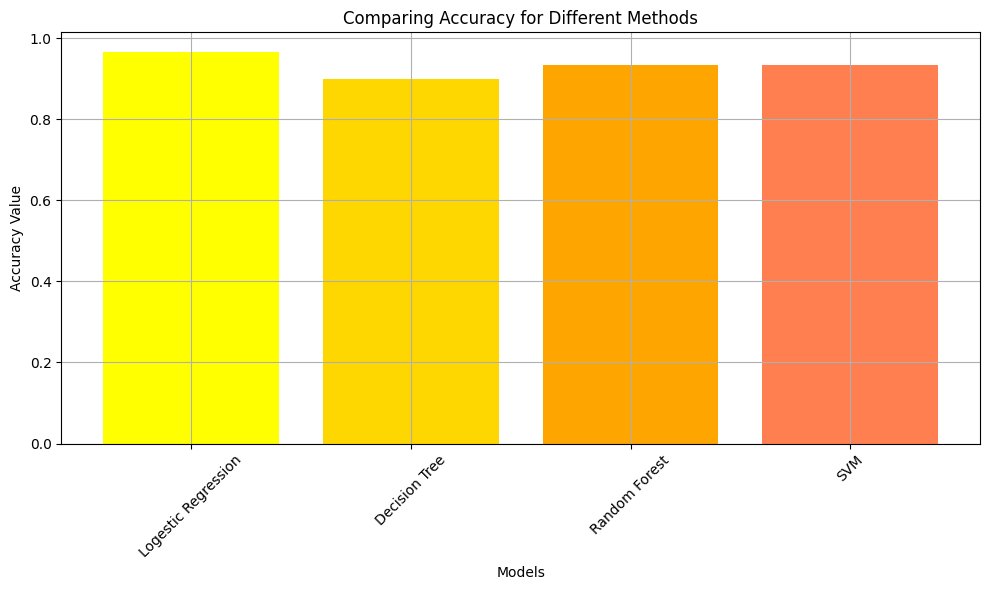

In [ ]:
# MSE values for each method on test data
methods     = ['Logestic Regression', 'Decision Tree', 'Random Forest', 'SVM']
mse_values = [logreg_accuracy, dt_accuracy, rf_accuracy, svm_accuracy]

# Creating a bar plot
plt.figure(figsize=(10, 6))
plt.bar(methods, mse_values, color=['yellow', 'gold', 'orange', 'coral'])

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy Value')
plt.title('Comparing Accuracy for Different Methods')
plt.xticks(rotation=45)
plt.grid()

# Display the plot
plt.tight_layout()
plt.show()

'''

After experimenting with various algorithms, we can conclude that Logestic Regression,
delivered the best results for Irish Flower Classification. 

This model showed superior accuracy and performance across several evaluation metrics compared to others.

'''